# Parameter Estimation for Kholodenko's Model of EGFR Pathway

In [1]:
import petab
import fides
import os
import libsbml
import amici
import amici.petab_simulate
import matplotlib.pyplot as plt
import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import petab.visualize
import pypesto.visualize as visualize
from petab.visualize import plot_data_and_simulation
from petab.visualize import plot_petab_problem
import importlib
import sys

In [ ]:
# import to petab
petab_problem = petab.Problem.from_yaml(
    
   "EGFR/EGFR.yaml"    #state the exact folder contains the yaml file
)
importer = pypesto.petab.PetabImporter(petab_problem)
# import to pypesto
problem = importer.create_problem()
model = importer.create_model(verbose=False)


In [ ]:

# create optimizer object which contains all information for doing the optimization
options = {'maxiter':2000}
optimizer = optimize.FidesOptimizer(options=options)
#optimizer = optimize.PyswarmOptimizer(options=options)
#optimizer = optimize.ScipyOptimizer()
#engine = pypesto.engine.SingleCoreEngine()
engine = pypesto.engine.MultiProcessEngine()

# do the optimization
result = optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=50, engine=engine
)


2022-06-17 12:43:41.762 - amici.petab_import - INFO - Successfully loaded model Step4_3 from /home/zarifeh/Downloads/Energy Modeling/TrytoFitData/Parameter EStimation/Enery Model_EGFR_ParameterEStimation/amici_models/Step4_3.


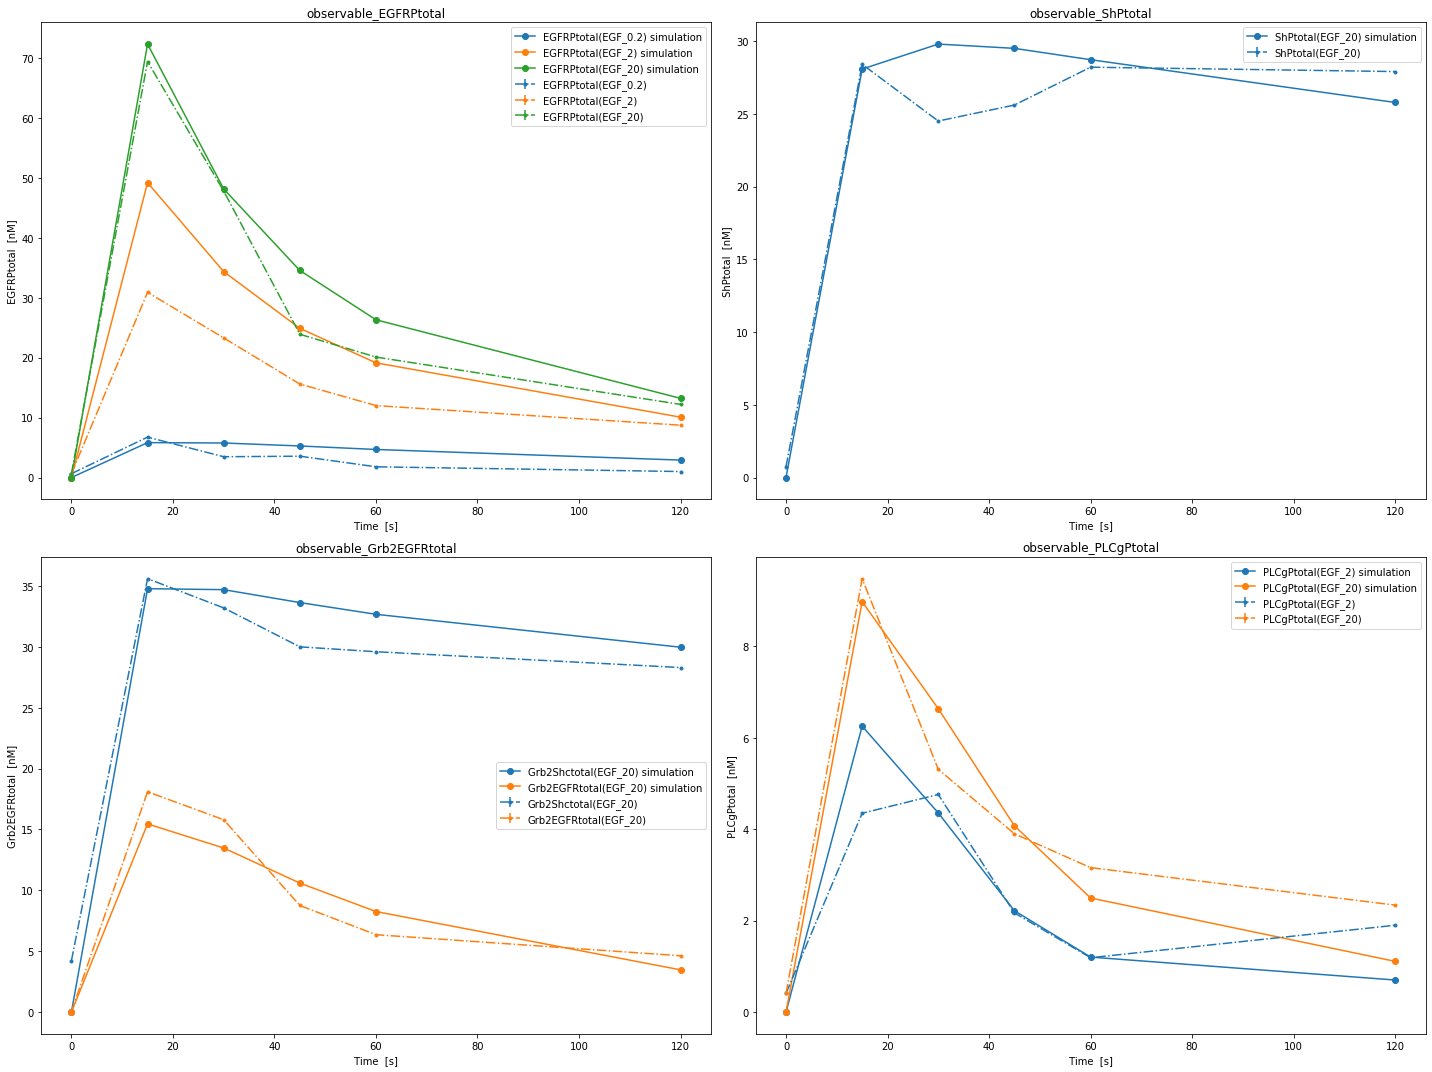

In [14]:
from pypesto.visualize.model_fit import visualize_optimized_model_fit

pp1=visualize_optimized_model_fit(petab_problem=petab_problem, result=result)

In [15]:
def get_x_mle(optimize_result, pypesto_problem, petab_problem, scaled=True):
    if not scaled:
        scaling = petab.parameters.get_optimization_parameter_scaling(
            petab_problem.parameter_df
        )
    return {
        x_id: (
            petab.parameters.unscale(x_value, scaling[x_id])
            if not scaled
            else x_value
        )
        for x_id, x_value in zip(
            pypesto_problem.x_names, optimize_result.list[0]["x"]
        )
        # if x_id in scaling
    }
x_mle_unscaled_original = get_x_mle(
    result.optimize_result,
    problem,
    petab_problem,
    scaled=False,
)
print("Parameters are estimated to be (linear scale):")
print(
    "\n".join(
        [
            f"{x_id}: {x_value}"
            for x_id, x_value in x_mle_unscaled_original.items()
        ]
    )
)

import libsbml

converter_config = libsbml.SBMLLocalParameterConverter().getDefaultProperties()
petab_problem.sbml_document.convert(converter_config)

obj = importer.create_objective()
ref = visualize.create_references(
    x=petab_problem.x_nominal_scaled, fval=obj(petab_problem.x_nominal_scaled)
)


Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/TrytoFitData/Parameter EStimation/Enery Model_EGFR_ParameterEStimation/amici_models/Step4_3.


Parameters are estimated to be (linear scale):
r3_k3f: 2.9999899999999795
r3_k3b: 9.999999999999979e-06
r4_V4: 1.141999999999998e-05
r4_K4: 53.999900002292314
r6_k6f: 1.0
r6_k6b: 1.8817
r7_k7f: 0.4721
r7_k7b: 0.1999
r8_V8: 0.3999
r8_K8: 0.4519
r14_k14f: 0.2161
r14_k14b: 1.6400000000000023e-05
r15_k15f: 4.5748999999999995
r15_k15b: 0.0048000000000000004
r16_V16: 0.7384
r16_K16: 26.4115
r25_k25f: 0.06999
r25_k25b: 0.00935
Gf_LR: 9.9999
Gf_RR: -0.4181000000000001
Gf_RSh: -0.8908
Gf_LRR: -0.4189
Gf_LRRL: -8.3796
Gf_RShP: -0.9999
Gf_RG: -0.4523
Gf_GS: -19.990000000000002
Gf_RGS: 4.999899999999995
Gf_ShG: -1.0
Gf_RShG: -0.99999
Gf_ShGS: 6.2501
Gf_RPL: 1.3764
Gf_RPLP: 0.2870189098002866
phi: 0.2115
Ea_RR: -1.9544
Ea_LR: -4.999999999999999
Ea_RSh: 4.3905
Ea_RG: 3.5635
Ea_GS: 9.5512
Ea_ShG: 2.88
Ea_RPL: 4.3999


# Kholodenko's Model Output

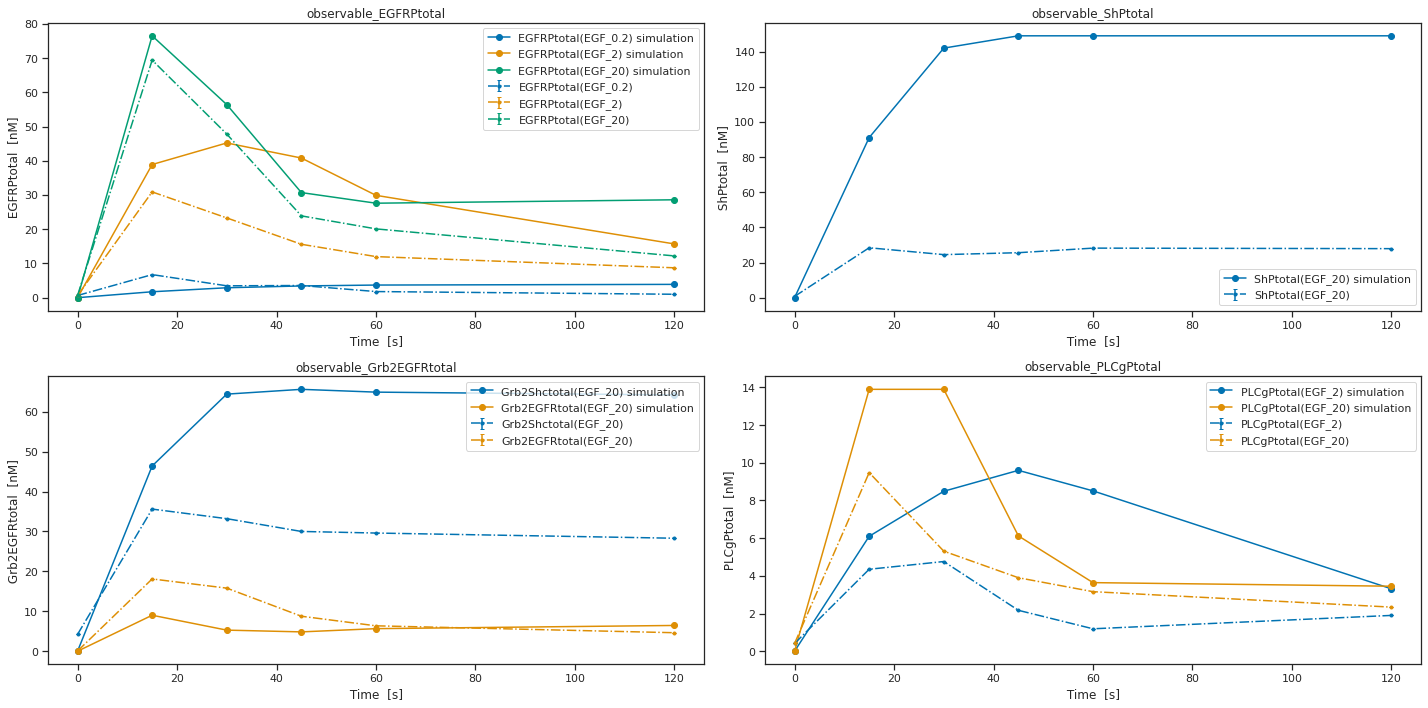

In [16]:
folder = "EGFR/"     #state the exact folder contains .tsv files

data_file_path = folder + "measurementData_EGFR.tsv"
condition_file_path = folder + "experimentalCondition_EGFR.tsv"
visualization_file_path2 = folder + "visualizationSpecification_EGFR.tsv"
simulation_file_path = folder + "simulatedData_EGFR_Kholo.tsv"
pp2=petab.visualize.plot_petab_problem(
  petab_problem,
  simulation_file_path,
  data_file_path
)


# Kai's Model Output

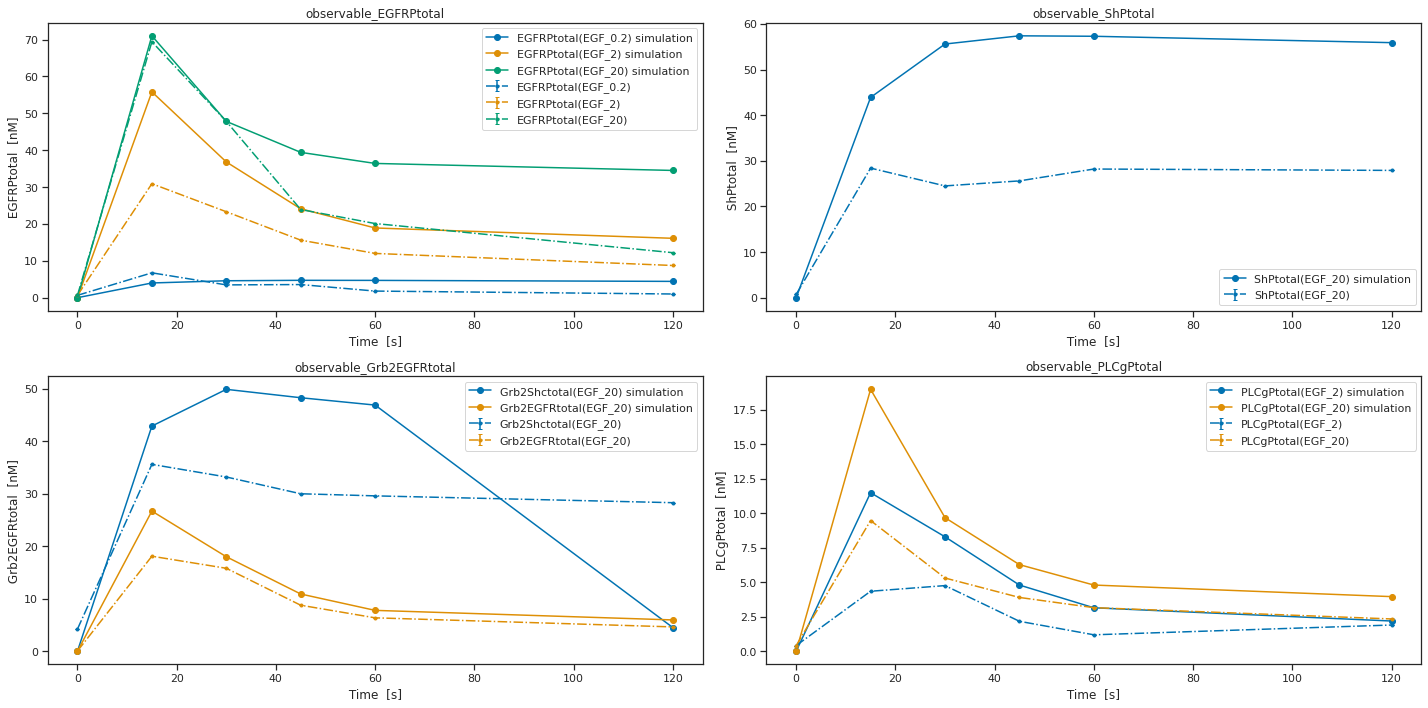

In [17]:
folder = "EGFR/"     #state the exact folder contains .tsv files

data_file_path = folder + "measurementData_EGFR.tsv"
condition_file_path = folder + "experimentalCondition_EGFR.tsv"
visualization_file_path2 = folder + "visualizationSpecification_EGFR.tsv"
simulation_file_path = folder + "simulatedData_EGFR_Kai.tsv"
pp2=petab.visualize.plot_petab_problem(
  petab_problem,
  simulation_file_path,
  data_file_path
)
